In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./df_de.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,15/05/2020,15,5,2020,913,101,Germany,DE,DEU,82927922.0,Europe
1,14/05/2020,14,5,2020,933,89,Germany,DE,DEU,82927922.0,Europe
2,13/05/2020,13,5,2020,798,101,Germany,DE,DEU,82927922.0,Europe
3,12/05/2020,12,5,2020,933,116,Germany,DE,DEU,82927922.0,Europe
4,11/05/2020,11,5,2020,357,22,Germany,DE,DEU,82927922.0,Europe


In [3]:
df = df.drop(columns =["countriesAndTerritories", "countryterritoryCode", "continentExp", "geoId"])

In [4]:
df['dateRep']=pd.to_datetime(df['dateRep'], dayfirst=True)
df

,dateRep,day,month,year,cases,deaths,popData2018
0,2020-05-15,15,5,2020,913,101,82927922.0
1,2020-05-14,14,5,2020,933,89,82927922.0
2,2020-05-13,13,5,2020,798,101,82927922.0
3,2020-05-12,12,5,2020,933,116,82927922.0
4,2020-05-11,11,5,2020,357,22,82927922.0
...,...,...,...,...,...,...,...
132,2020-01-04,4,1,2020,0,0,82927922.0
133,2020-01-03,3,1,2020,0,0,82927922.0
134,2020-01-02,2,1,2020,0,0,82927922.0
135,2020-01-01,1,1,2020,0,0,82927922.0


In [5]:
df.rename(columns={"dateRep":"Date", "popData2018":"Population2018"}, inplace=True)
df.rename(str. capitalize, axis="columns", inplace=True)
df

,Date,Day,Month,Year,Cases,Deaths,Population2018
0,2020-05-15,15,5,2020,913,101,82927922.0
1,2020-05-14,14,5,2020,933,89,82927922.0
2,2020-05-13,13,5,2020,798,101,82927922.0
3,2020-05-12,12,5,2020,933,116,82927922.0
4,2020-05-11,11,5,2020,357,22,82927922.0
...,...,...,...,...,...,...,...
132,2020-01-04,4,1,2020,0,0,82927922.0
133,2020-01-03,3,1,2020,0,0,82927922.0
134,2020-01-02,2,1,2020,0,0,82927922.0
135,2020-01-01,1,1,2020,0,0,82927922.0


In [6]:
df.set_index(["Date"])
#inplace = True 

,Day,Month,Year,Cases,Deaths,Population2018
Date,,,,,,
2020-05-15,15,5,2020,913,101,82927922.0
2020-05-14,14,5,2020,933,89,82927922.0
2020-05-13,13,5,2020,798,101,82927922.0
2020-05-12,12,5,2020,933,116,82927922.0
2020-05-11,11,5,2020,357,22,82927922.0
...,...,...,...,...,...,...
2020-01-04,4,1,2020,0,0,82927922.0
2020-01-03,3,1,2020,0,0,82927922.0
2020-01-02,2,1,2020,0,0,82927922.0


In [7]:
df_date = df.sort_values(by=["Date"], ascending=True, inplace=True)
df_date

In [8]:
df["CumCases"] = df.Cases.cumsum()

In [9]:
df["CumDeaths"] = df.Deaths.cumsum()
df

,Date,Day,Month,Year,Cases,Deaths,Population2018,CumCases,CumDeaths
136,2019-12-31,31,12,2019,0,0,82927922.0,0,0
135,2020-01-01,1,1,2020,0,0,82927922.0,0,0
134,2020-01-02,2,1,2020,0,0,82927922.0,0,0
133,2020-01-03,3,1,2020,0,0,82927922.0,0,0
132,2020-01-04,4,1,2020,0,0,82927922.0,0,0
...,...,...,...,...,...,...,...,...,...
4,2020-05-11,11,5,2020,357,22,82927922.0,169575,7417
3,2020-05-12,12,5,2020,933,116,82927922.0,170508,7533
2,2020-05-13,13,5,2020,798,101,82927922.0,171306,7634
1,2020-05-14,14,5,2020,933,89,82927922.0,172239,7723


Text(0.5, 1.0, 'Germany: Development Cases and Deaths')

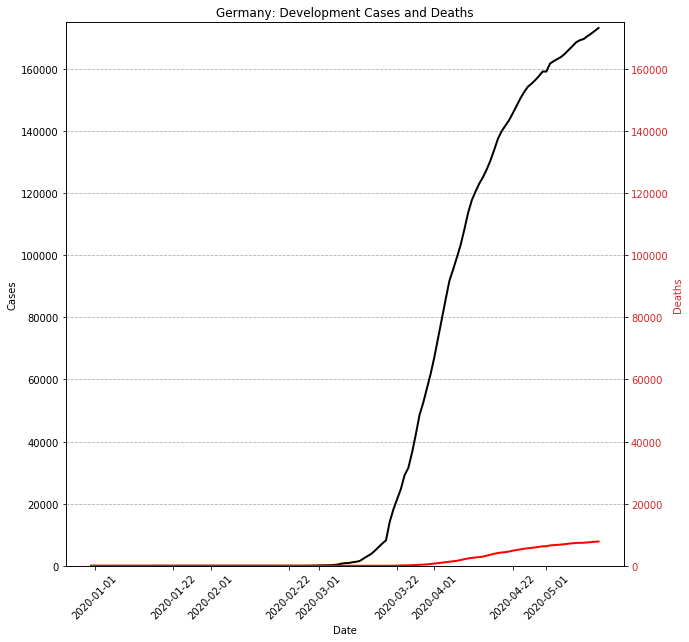

In [79]:
fig, ax1 = plt.subplots(1, figsize= (10,10))
color = "tab:black"
ax1.set_xlabel("Date")
ax1.set_ylabel("Cases")
ax1.yaxis.grid(True, linestyle = "--")
ax1.plot("Date", "CumCases", data=df, color ="black", linewidth = 2)
plt.xticks(rotation=45)
plt.ylim(0, 175000)
#plt.xticks(ticks=())

ax2 = ax1.twinx()
color = "tab:red"
ax2.plot("Date", "CumDeaths", data=df, color="red", linewidth = 2)
ax2.set_ylabel("Deaths", color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0, 175000)

#plt.xticks([2020- 1- 1, 2020- 2- 1, 2020- 3- 1, 2020- 4- 1, 2020- 5- 1])

#plt.legend(loc="upper center", title = "Cases", frameon=True)
plt.title("Germany: Development Cases and Deaths")

Text(0.5, 1.0, 'Germany: Development Cases and Deaths')

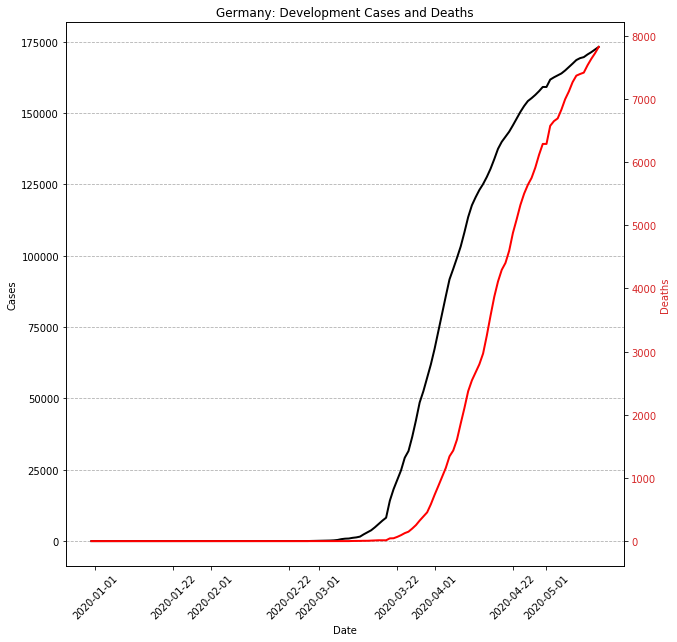

In [12]:
fig, ax1 = plt.subplots(1, figsize= (10,10))
color = "tab:black"
ax1.set_xlabel("Date")
ax1.set_ylabel("Cases")
ax1.yaxis.grid(True, linestyle = "--")
ax1.plot("Date", "CumCases", data=df, color ="black", linewidth = 2)
plt.xticks(rotation=45)
#plt.xticks(ticks=())

ax2 = ax1.twinx()
color = "tab:red"
ax2.plot("Date", "CumDeaths", data=df, color="red", linewidth = 2)
ax2.set_ylabel("Deaths", color=color)
ax2.tick_params(axis='y', labelcolor=color)

#plt.legend(loc="upper center", title = "Cases", frameon=True)
plt.title("Germany: Development Cases and Deaths")